# Data Cleaning
## Importing data and packages

In [1]:
import re
import random
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.impute import SimpleImputer
import used_cars

In [2]:
sb.set_theme()
pd.set_option('display.max_columns', None)

In [3]:
filename = "../Datasets/used_cars_data_medium.feather"
df = pd.read_feather(filename, used_cars.Info.columns).fillna(pd.NA)

## Data Cleaning & Feature Engineering
Remove rows where the value of the columns in `cols` are null.

In [4]:
cols = [
    'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 
    'maximum_seating', 'width', 'isCab', 'salvage', 'theft_title', 'fleet', 
    'frame_damaged', 'has_accidents', 'body_type', 'fuel_type', 'transmission', 
    'wheel_system', 'engine_type', 'power', 'torque'
]
dropped_df =  df[df[cols].notna().all(1)]

Drop unused columns.

In [5]:
null_columns = [
    "combine_fuel_economy", "is_certified", "vehicle_damage_category", 
    "bed_height", "bed_length"
]
useless_columns = ["description", "main_picture_url"]
unused_columns = [
    "city", "model_name", "interior_color", "major_options", "trimId", 
    'trim_name', 'sp_name', 'dealer_zip', "sp_id", 'latitude', 'longitude', 
    'listing_id', "vin", "exterior_color"
]
remove_cols = null_columns + useless_columns + unused_columns
dropped_df = dropped_df.drop(columns=remove_cols)

In [6]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13258 entries, 3 to 29997
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   back_legroom          13258 non-null  object 
 1   bed                   156 non-null    object 
 2   body_type             13258 non-null  object 
 3   cabin                 297 non-null    object 
 4   city_fuel_economy     11822 non-null  float64
 5   daysonmarket          13258 non-null  int64  
 6   engine_cylinders      13258 non-null  object 
 7   engine_displacement   13258 non-null  float64
 8   engine_type           13258 non-null  object 
 9   fleet                 13258 non-null  object 
 10  frame_damaged         13258 non-null  object 
 11  franchise_dealer      13258 non-null  bool   
 12  franchise_make        8486 non-null   object 
 13  front_legroom         13258 non-null  object 
 14  fuel_tank_volume      13258 non-null  object 
 15  fuel_type          

In [7]:
dropped_df.head(5)

,back_legroom,bed,body_type,cabin,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_cpo,is_new,is_oemcpo,length,listed_date,listing_color,make_name,maximum_seating,mileage,owner_count,power,price,salvage,savings_amount,seller_rating,theft_title,torque,transmission,transmission_display,wheel_system,wheel_system_display,wheelbase,width,year
3,33.7 in,<NA>,SUV / Crossover,<NA>,20.0,3,H4,2500.0,H4,False,False,True,Subaru,43.6 in,15 gal,Gasoline,False,62.6 in,25.0,173.0,False,<NA>,False,<NA>,176.6 in,2020-09-08,BLACK,Subaru,5 seats,163512.0,2.0,"173 hp @ 6,000 RPM",5794.0,False,505,4.611111,False,"166 lb-ft @ 4,400 RPM",A,4-Speed Automatic,AWD,All-Wheel Drive,99.4 in,68.3 in,2006
6,38.5 in,<NA>,SUV / Crossover,<NA>,21.0,20,I4,2400.0,I4,False,False,False,<NA>,41.3 in,15.3 gal,Gasoline,False,66.1 in,27.0,180.0,False,<NA>,False,<NA>,179.3 in,2020-08-20,RED,Honda,5 seats,131031.0,3.0,"180 hp @ 6,800 RPM",11495.0,False,1219,NaN,False,"161 lb-ft @ 4,400 RPM",A,5-Speed Automatic,AWD,All-Wheel Drive,103.1 in,71.6 in,2011
10,35.1 in,<NA>,Sedan,<NA>,NaN,12,I4,2000.0,I4,False,False,False,<NA>,41.3 in,15.3 gal,Gasoline,False,54.6 in,NaN,252.0,False,<NA>,False,<NA>,186.3 in,2020-08-29,GREEN,Audi,5 seats,34941.0,1.0,"252 hp @ 5,000 RPM",35998.0,False,1643,5.000000,False,"273 lb-ft @ 1,600 RPM",A,Automatic,AWD,All-Wheel Drive,111.2 in,79.9 in,2018
14,40.4 in,<NA>,SUV / Crossover,<NA>,27.0,31,I4,1500.0,I4,False,False,True,Honda,41.3 in,14 gal,Gasoline,False,66.5 in,33.0,190.0,False,<NA>,False,<NA>,180.6 in,2020-08-11,GRAY,Honda,5 seats,23755.0,1.0,"190 hp @ 5,600 RPM",25752.0,False,115,3.750000,False,"179 lb-ft @ 2,000 RPM",CVT,Continuously Variable Transmission,AWD,All-Wheel Drive,104.7 in,73 in,2017
17,39.4 in,<NA>,SUV / Crossover,<NA>,18.0,35,V6,3300.0,V6,False,False,True,Kia,44.1 in,18.8 gal,Gasoline,False,66.5 in,25.0,290.0,False,True,False,True,187.4 in,2020-08-06,BLACK,Kia,7 seats,49023.0,1.0,"290 hp @ 6,400 RPM",24988.0,False,143,4.250000,False,"252 lb-ft @ 5,300 RPM",A,6-Speed Automatic,FWD,Front-Wheel Drive,109.4 in,74.4 in,2017


[]

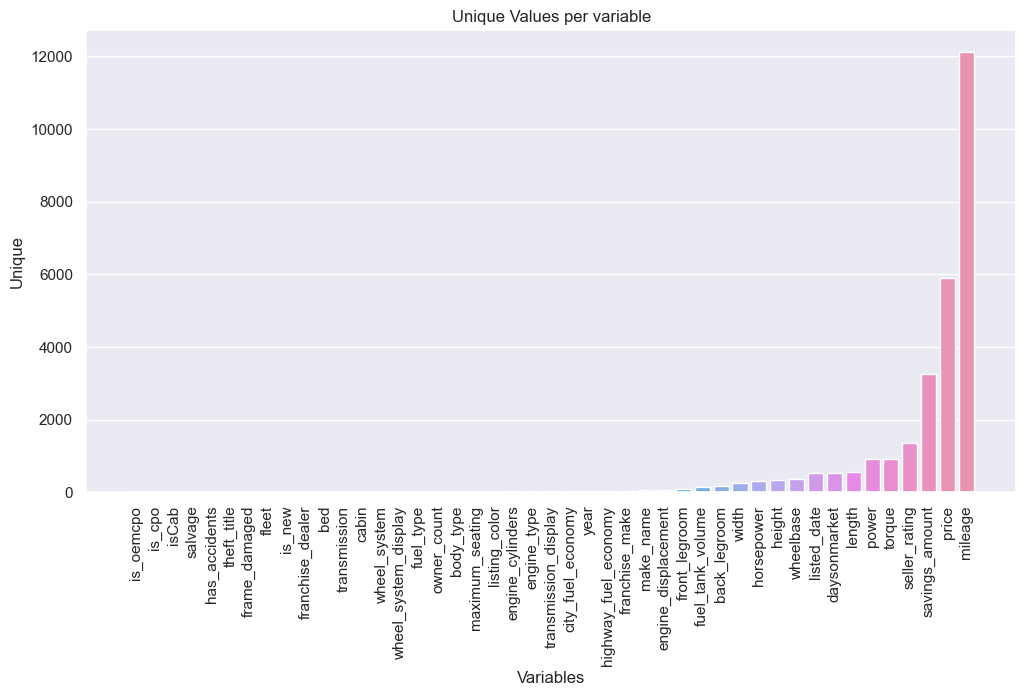

In [8]:
plot_df = dropped_df.nunique().to_frame(name="Unique")
plot_df["Variables"] = dropped_df.nunique().index
plot_df = plot_df.reset_index().sort_values(by=['Unique'])
sb.set_theme("notebook", "darkgrid", rc={"figure.figsize": (12, 6)})
plt.xticks(rotation=90)
plt.title("Unique Values per variable")
sb.barplot(data = plot_df, x = "Variables", y = "Unique")
plt.plot()

In [9]:
plot_df

,index,Unique,Variables
23,is_oemcpo,1,is_oemcpo
21,is_cpo,1,is_cpo
20,isCab,2,isCab
33,salvage,2,salvage
16,has_accidents,2,has_accidents
36,theft_title,2,theft_title
10,frame_damaged,2,frame_damaged
9,fleet,2,fleet
22,is_new,2,is_new
11,franchise_dealer,2,franchise_dealer


### Add `isTruck` column and update `cabin` column
Adds `isTruck` column based on the `bed` column. The value of `isTruck` is True unless `bed` is null. Then, changes data in the `cabin` column to `"none"` when `isTruck` is False.

In [10]:
dropped_df.insert(2, "isTruck", dropped_df["bed"].notna())
dropped_df.loc[(dropped_df["isTruck"] == False) 
                & (dropped_df["cabin"].isna()), "cabin"] = "none"

### Converts columns from object to boolean dtype

In [11]:
boolean_cols = ["fleet", "frame_damaged", "has_accidents", "isCab",
                "is_cpo", "is_oemcpo", "salvage", "theft_title"]
dropped_df[boolean_cols] = dropped_df[boolean_cols].replace(
    {"True": True, "False": False})
dropped_df[boolean_cols] = dropped_df[boolean_cols].astype("boolean")

### Converting string values to integer

These include the columns: `back_legroom`, `front_legroom`, `fuel_tank_volume`, `height`, `length`, `maximum_seating`, `wheelbase`, `width`, `bed_length`

In [12]:
strConv_list = [
    "back_legroom", "front_legroom", "fuel_tank_volume", "height", "length", 
    "maximum_seating", "wheelbase", "width"
]

In [13]:
for item in strConv_list:
    print(item)
    
    print(dropped_df[item].unique())
    print()

back_legroom
['33.7 in' '38.5 in' '35.1 in' '40.4 in' '39.4 in' '34.4 in' '32.9 in'
 '33.5 in' '37.5 in' '0 in' '39.1 in' '35.8 in' '31.7 in' '34.5 in'
 '36.8 in' '29.8 in' '33.6 in' '36.3 in' '37 in' '38.3 in' '39.8 in'
 '35.3 in' '37.4 in' '38.6 in' '39 in' '36.7 in' '43.6 in' '35.6 in'
 '40.9 in' '39.7 in' '36.1 in' '32.6 in' '41.7 in' '45.2 in' '34.6 in'
 '36.2 in' '38.7 in' '37.6 in' '35.7 in' '--' '30.6 in' '33.9 in'
 '34.1 in' '42.2 in' '36.5 in' '41.4 in' '37.2 in' '38.4 in' '38.1 in'
 '37.9 in' '43 in' '40 in' '30.8 in' '38 in' '33.2 in' '35 in' '39.9 in'
 '38.2 in' '39.3 in' '34.3 in' '32.7 in' '31.2 in' '37.8 in' '37.1 in'
 '39.6 in' '32.5 in' '40.2 in' '43.5 in' '41.8 in' '34.7 in' '29 in'
 '40.3 in' '31.9 in' '41.3 in' '33 in' '45.9 in' '33.4 in' '38.8 in'
 '29.3 in' '31.4 in' '36.9 in' '37.3 in' '39.5 in' '41 in' '29.9 in'
 '34.8 in' '40.1 in' '36.6 in' '36.4 in' '43.3 in' '41.9 in' '40.6 in'
 '35.5 in' '33.1 in' '37.7 in' '43.4 in' '29.2 in' '42.1 in' '35.2 in'
 '35.9 in

In [14]:
for col in strConv_list:
  series = dropped_df[col]
  # Some columns contains "--"
  series = series.apply(
      lambda s: re.sub(r"[^0-9.]", "", s) 
      if pd.notna(s) and "--" not in s else None
  )
  series = pd.to_numeric(series, errors="coerce")
  dropped_df[col] = series

In [15]:
def extract_rpm(s):
    if pd.notna(s) and "--" not in s and "@" in s:
        return s[s.find("@")+1 : s.find("RPM")].strip().replace(",", "")
    else:
        return None

for col, unit in [("power", "hp"), ("torque", "lb-ft")]:
    rpm_col = f"{col}RPM"

    value_series = dropped_df[col].apply(
        lambda s: s[: s.find(unit)].strip().replace(",", "")
        if pd.notna(s) and "--" not in s else None)
    rpm_series = dropped_df[col].apply(extract_rpm)

    dropped_df[col] = pd.to_numeric(value_series)
    dropped_df[rpm_col] = pd.to_numeric(rpm_series)

    dropped_df.insert(dropped_df.columns.get_loc(col) + 1, rpm_col, dropped_df.pop(rpm_col))

### Convert discrete variables to Int64 dtype
Int64 accepts null values.

In [16]:
discrete_columns = ["daysonmarket", "maximum_seating", "owner_count",
                    "savings_amount", "year"]
dropped_df[discrete_columns] = np.rint(dropped_df[discrete_columns]).astype("Int64")

### Convert categorical variables to category dtype

In [17]:
categorical_columns = [
    "bed", "body_type", "cabin", "engine_cylinders", "engine_type", 
    "franchise_make", "fuel_type", "make_name", "transmission", 
    "transmission_display", "wheel_system", "wheel_system_display", 
    "listing_color"
]
binary_columns = ["isTruck", "is_new", "franchise_dealer"]
all_categorical_columns = categorical_columns + binary_columns
dropped_df[all_categorical_columns] = dropped_df[all_categorical_columns].astype("category")

### Convert `listed_date` to datetime64[ns] dtype

In [18]:
dropped_df["listed_date"] = dropped_df["listed_date"].astype("datetime64[ns]")

### Add `car_age` column from `listed_date` and `year` columns.

In [19]:
dropped_df["car_age"] = pd.to_numeric(
    dropped_df["listed_date"].dt.year).sub(dropped_df["year"],
    axis=0
)

## Imputing
### Filling null values for numerical variables

In [20]:
imputer = SimpleImputer()

num_variables = [
    "back_legroom", "city_fuel_economy", "daysonmarket", "engine_displacement", 
    "front_legroom", "fuel_tank_volume", "height", "highway_fuel_economy", 
    "horsepower", "length", "maximum_seating", "mileage", "owner_count", 
    "power", "powerRPM", "savings_amount", "seller_rating", "torque", 
    "torqueRPM", "wheelbase", "width", "year", "car_age"
]

imputer.fit(dropped_df[num_variables])
dropped_df[num_variables] = imputer.transform(dropped_df[num_variables])

In [21]:
dropped_df[num_variables].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13258 entries, 3 to 29997
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   back_legroom          13258 non-null  float64
 1   city_fuel_economy     13258 non-null  float64
 2   daysonmarket          13258 non-null  float64
 3   engine_displacement   13258 non-null  float64
 4   front_legroom         13258 non-null  float64
 5   fuel_tank_volume      13258 non-null  float64
 6   height                13258 non-null  float64
 7   highway_fuel_economy  13258 non-null  float64
 8   horsepower            13258 non-null  float64
 9   length                13258 non-null  float64
 10  maximum_seating       13258 non-null  float64
 11  mileage               13258 non-null  float64
 12  owner_count           13258 non-null  float64
 13  power                 13258 non-null  float64
 14  powerRPM              13258 non-null  float64
 15  savings_amount     

## Binary values

These include the columns: `isCab`, `is_cpo`, `is_oemcpo`, `salvage`, `theft_title`, `fleet`, `franchise_dealer`, `is_new`, `frame_damaged`, `has_accidents`

In [22]:
labEnc_list = [
    'isCab', 'is_cpo', 'is_oemcpo', 'salvage', 'theft_title', 'fleet', 
    'franchise_dealer', 'is_new', 'frame_damaged', 'has_accidents'
]

In [23]:
for item in labEnc_list:
    print(item)
    
    print(dropped_df[item].unique())
    print()

isCab
<BooleanArray>
[False, True]
Length: 2, dtype: boolean

is_cpo
<BooleanArray>
[<NA>, True]
Length: 2, dtype: boolean

is_oemcpo
<BooleanArray>
[<NA>, True]
Length: 2, dtype: boolean

salvage
<BooleanArray>
[False, True]
Length: 2, dtype: boolean

theft_title
<BooleanArray>
[False, True]
Length: 2, dtype: boolean

fleet
<BooleanArray>
[False, True]
Length: 2, dtype: boolean

franchise_dealer
[True, False]
Categories (2, bool): [False, True]

is_new
[False, True]
Categories (2, bool): [False, True]

frame_damaged
<BooleanArray>
[False, True]
Length: 2, dtype: boolean

has_accidents
<BooleanArray>
[False, True]
Length: 2, dtype: boolean



In [24]:
dropped_df.head(3)

,back_legroom,bed,isTruck,body_type,cabin,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_cpo,is_new,is_oemcpo,length,listed_date,listing_color,make_name,maximum_seating,mileage,owner_count,power,powerRPM,price,salvage,savings_amount,seller_rating,theft_title,torque,torqueRPM,transmission,transmission_display,wheel_system,wheel_system_display,wheelbase,width,year,car_age
3,33.7,NaN,False,SUV / Crossover,none,20.000000,3.0,H4,2500.0,H4,False,False,True,Subaru,43.6,15.0,Gasoline,False,62.6,25.00000,173.0,False,<NA>,False,<NA>,176.6,2020-09-08,BLACK,Subaru,5.0,163512.0,2.0,173.0,6000.0,5794.0,False,505.0,4.611111,False,166.0,4400.0,A,4-Speed Automatic,AWD,All-Wheel Drive,99.4,68.3,2006.0,14.0
6,38.5,NaN,False,SUV / Crossover,none,21.000000,20.0,I4,2400.0,I4,False,False,False,NaN,41.3,15.3,Gasoline,False,66.1,27.00000,180.0,False,<NA>,False,<NA>,179.3,2020-08-20,RED,Honda,5.0,131031.0,3.0,180.0,6800.0,11495.0,False,1219.0,4.280081,False,161.0,4400.0,A,5-Speed Automatic,AWD,All-Wheel Drive,103.1,71.6,2011.0,9.0
10,35.1,NaN,False,Sedan,none,20.797158,12.0,I4,2000.0,I4,False,False,False,NaN,41.3,15.3,Gasoline,False,54.6,28.26586,252.0,False,<NA>,False,<NA>,186.3,2020-08-29,GREEN,Audi,5.0,34941.0,1.0,252.0,5000.0,35998.0,False,1643.0,5.000000,False,273.0,1600.0,A,Automatic,AWD,All-Wheel Drive,111.2,79.9,2018.0,2.0


In [25]:
dropped_df[labEnc_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13258 entries, 3 to 29997
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   isCab             13258 non-null  boolean 
 1   is_cpo            1593 non-null   boolean 
 2   is_oemcpo         1148 non-null   boolean 
 3   salvage           13258 non-null  boolean 
 4   theft_title       13258 non-null  boolean 
 5   fleet             13258 non-null  boolean 
 6   franchise_dealer  13258 non-null  category
 7   is_new            13258 non-null  category
 8   frame_damaged     13258 non-null  boolean 
 9   has_accidents     13258 non-null  boolean 
dtypes: boolean(8), category(2)
memory usage: 336.8 KB


Filling null values for boolean/binary variables

In [26]:
dropped_df[['is_cpo', 'is_oemcpo']] = dropped_df[['is_cpo', 'is_oemcpo']].fillna(False)

bool_imputer = SimpleImputer(strategy="most_frequent")
bool_imputer.fit(dropped_df[labEnc_list])
dropped_df[labEnc_list] = bool_imputer.transform(dropped_df[labEnc_list])
dropped_df[labEnc_list] = dropped_df[labEnc_list].replace(
    {0.: False, 1.: True}
)

for item in labEnc_list:
    print(item)
    
    print(dropped_df[item].unique())
    print()

isCab
[False  True]

is_cpo
[False  True]

is_oemcpo
[False  True]

salvage
[False  True]

theft_title
[False  True]

fleet
[False  True]

franchise_dealer
[ True False]

is_new
[False  True]

frame_damaged
[False  True]

has_accidents
[False  True]



## Non-Binary Categorical Variables
These generally have many different categories and include the columns: `body_type`, `cabin`, `fuel_type`, `transmission`, `wheel_system`, `frachise_make`, `engine_type`, `bed`

In [27]:
tarEnc_list = ['body_type', 'cabin', 'fuel_type', 'transmission', 'wheel_system', 
                'franchise_make', 'engine_type', 'bed']

In [28]:
for item in tarEnc_list:
    print(item)
    
    print(dropped_df[item].unique())
    print()

body_type
['SUV / Crossover', 'Sedan', 'Pickup Truck', 'Wagon', 'Coupe', 'Minivan', 'Van', 'Hatchback', 'Convertible']
Categories (9, object): ['Convertible', 'Coupe', 'Hatchback', 'Minivan', ..., 'SUV / Crossover', 'Sedan', 'Van', 'Wagon']

cabin
['none', 'Crew Cab', 'Large Crew Cab', 'Extended Cab', 'Regular Cab', NaN]
Categories (5, object): ['Crew Cab', 'Extended Cab', 'Large Crew Cab', 'Regular Cab', 'none']

fuel_type
['Gasoline', 'Flex Fuel Vehicle', 'Diesel', 'Biodiesel', 'Hybrid', 'Compressed Natural Gas']
Categories (6, object): ['Biodiesel', 'Compressed Natural Gas', 'Diesel', 'Flex Fuel Vehicle', 'Gasoline', 'Hybrid']

transmission
['A', 'CVT', 'M', 'Dual Clutch']
Categories (4, object): ['A', 'CVT', 'Dual Clutch', 'M']

wheel_system
['AWD', 'FWD', '4WD', 'RWD', '4X2']
Categories (5, object): ['4WD', '4X2', 'AWD', 'FWD', 'RWD']

franchise_make
['Subaru', NaN, 'Honda', 'Kia', 'Toyota', ..., 'McLaren', 'Shelby', 'Lotus', 'Rolls-Royce', 'Aston Martin']
Length: 44
Categories (4

Replace NaN values with "none" category

In [29]:
dropped_df[tarEnc_list] = dropped_df[tarEnc_list].astype("object")
dropped_df[tarEnc_list] = dropped_df[tarEnc_list].fillna("none")
dropped_df[tarEnc_list] = dropped_df[tarEnc_list].astype("category")

for item in tarEnc_list:
    print(item)
    
    print(dropped_df[item].unique())
    print()

body_type
['SUV / Crossover', 'Sedan', 'Pickup Truck', 'Wagon', 'Coupe', 'Minivan', 'Van', 'Hatchback', 'Convertible']
Categories (9, object): ['Convertible', 'Coupe', 'Hatchback', 'Minivan', ..., 'SUV / Crossover', 'Sedan', 'Van', 'Wagon']

cabin
['none', 'Crew Cab', 'Large Crew Cab', 'Extended Cab', 'Regular Cab']
Categories (5, object): ['Crew Cab', 'Extended Cab', 'Large Crew Cab', 'Regular Cab', 'none']

fuel_type
['Gasoline', 'Flex Fuel Vehicle', 'Diesel', 'Biodiesel', 'Hybrid', 'Compressed Natural Gas']
Categories (6, object): ['Biodiesel', 'Compressed Natural Gas', 'Diesel', 'Flex Fuel Vehicle', 'Gasoline', 'Hybrid']

transmission
['A', 'CVT', 'M', 'Dual Clutch']
Categories (4, object): ['A', 'CVT', 'Dual Clutch', 'M']

wheel_system
['AWD', 'FWD', '4WD', 'RWD', '4X2']
Categories (5, object): ['4WD', '4X2', 'AWD', 'FWD', 'RWD']

franchise_make
['Subaru', 'none', 'Honda', 'Kia', 'Toyota', ..., 'McLaren', 'Shelby', 'Lotus', 'Rolls-Royce', 'Aston Martin']
Length: 44
Categories (44,

## Export the cleaned Dataset for EDA

In [30]:
dropped_df.to_csv("../Datasets/cleaned_used_cars_dataset.csv")